### Importing the required libraries for various operations:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st
import random
import math
from IPython.display import Markdown, display

In [2]:
### Print the following string in .md syntax
def printmd(string):
    display(Markdown(string))

### Weather dataset containing a month's weather data in which data is generated per hour

In [3]:
df=pd.read_csv('weatherHistory.csv')

# 1. exploratory data analysis

## a. description of dataset

### i. displaying the whole dataset

In [4]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,0.0,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,0.0,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,0.0,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,0.0,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,0.0,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


 ### **ii. description of dataset**

- This dataset consists of the weather records for a month taken with the observations being taken down and noted per hour.

- It consists of various aspects of weather like precipitation, humidity, wind speed, wind bearing, visibiliry, loud cover, pressure, temperature, apparent temperature against a particular instant of time.

- The summary and the daily summary are noted down appropriately as per the parameters collected.

- Most of the parameters are numerical with the remaining few being categorical.

- The objective of this project is to make optimum use of the dataset to extract maximum and most relevant information out of the dataset for various purposes.

- The first section of the project would consist of descriptive statistics while the second half would contain inferential statistics.

- With the help of the relationships generated between various variables, we can appropriately put this to a great use by inferring various parameters from it.

- While this is just a sample of 720 records, we can easily put this to a great use to infer about various weather parameters on the other given days with optimal accuracy and precision along with mininal margin of error.

### **iii. Meaning of columns in the dataset**

- **Formatted Date:** 
 Denotes the particular time instance

- **Summary:**
 Denotes the summary of the weather for that particular instance of time

- **Precip Type:**
 Indicates the type of precipitation (Categorical variable)

- **Temperature (C):**
 Denotes the absolute temperature in that period of time 

- **Apparent Temperature (C):** 
 Denotes the temperature perceived by humans in that period of time

- **Humidity:** 
 Denotes the humidity in that period of time

- **Wind Speed (km/h):** 
 Denotes the wind speed in that period of time

- **Wind Bearing (degrees):**
 Denotes the compass direction towards which an object is moving because of the wind

- **Visibility (km):**
 Denotes the greatest distance upto which an object can be seen clearly

- **Cloud Cover:**
 Refers to the fraction of the sky covered by the clouds 

- **Pressure (millibars):**
 Denotes the amount of pressure reading as displayed in the barometer

- **Daily Summary:**
 Displays the weather summary for the whole day by implementing appropriate statistical measures across the period of 24 hours

## b. data cleaning

### i. handling of missing data by dropping:

### ii. handling of missing data by imputing:

### iii. handling via the best approach (if different from any of the methods mentioned above):

### iv. reasons for the above operations

## c. Removal of unwanted observations (duplicate/irrelevant/repetitive)

## d. Fixing of typos and inconsistent capitalization

_______________________________________________________________________________________________________________________________

# 2. Graph visualization

## a. visualization of dataset to extract meaningful insights

## b. implementation of graph visualization techniques (any 3) (most suitable)

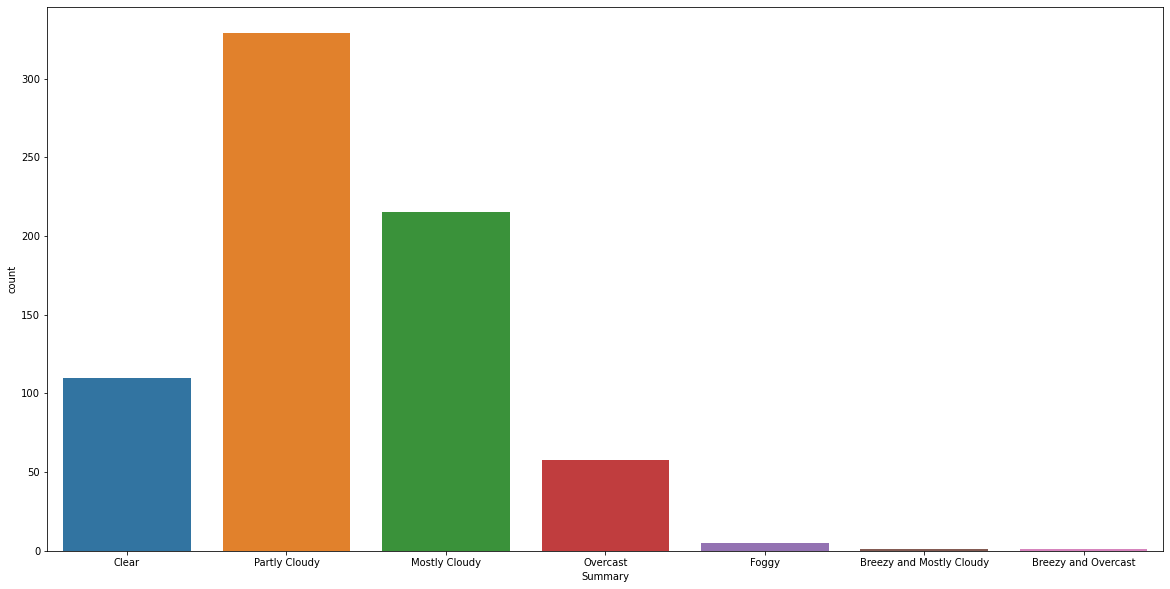

In [5]:
#number of hours for each summary category (in a month)

plt.figure(figsize = (20,10))
sns.countplot(df["Summary"])
plt.show()

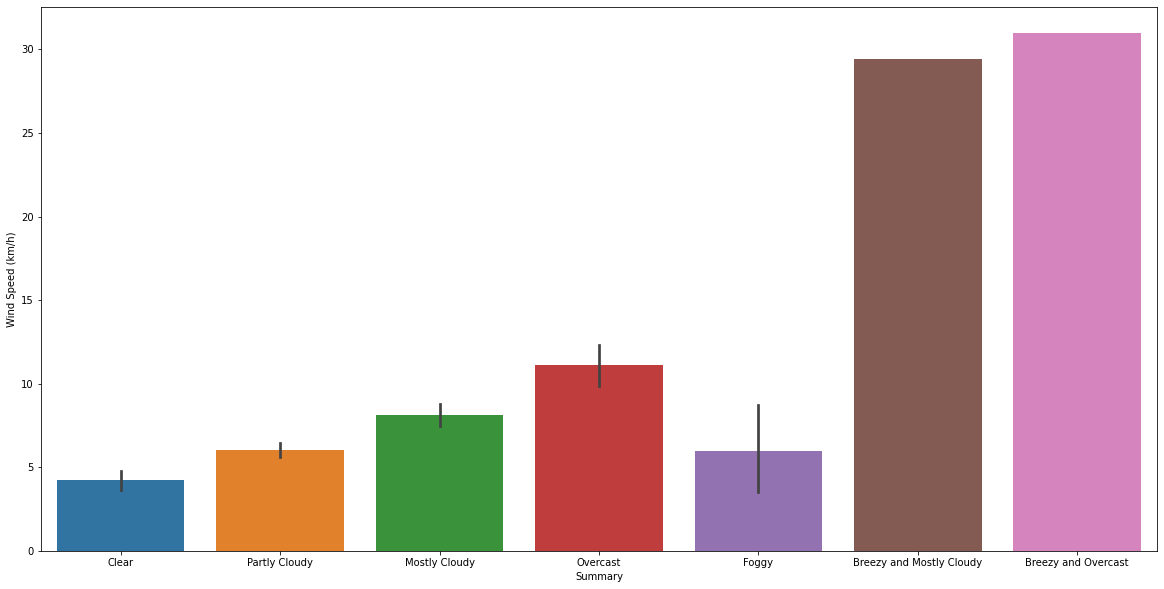

In [6]:
# effect of weather on wind speed
plt.figure(figsize = (20,10))
sns.barplot(x = df["Summary"],y = df["Wind Speed (km/h)"])
plt.show()

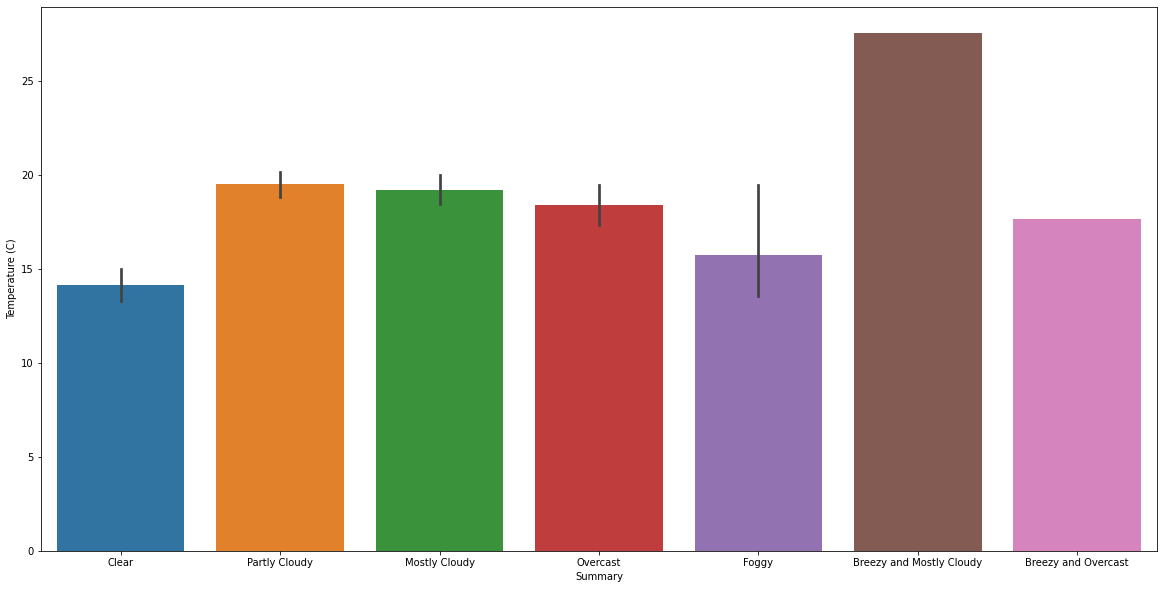

In [7]:
#effect of weather on temperature
plt.figure(figsize = (20,10))
sns.barplot(x = df["Summary"],y = df["Temperature (C)"])
plt.show()

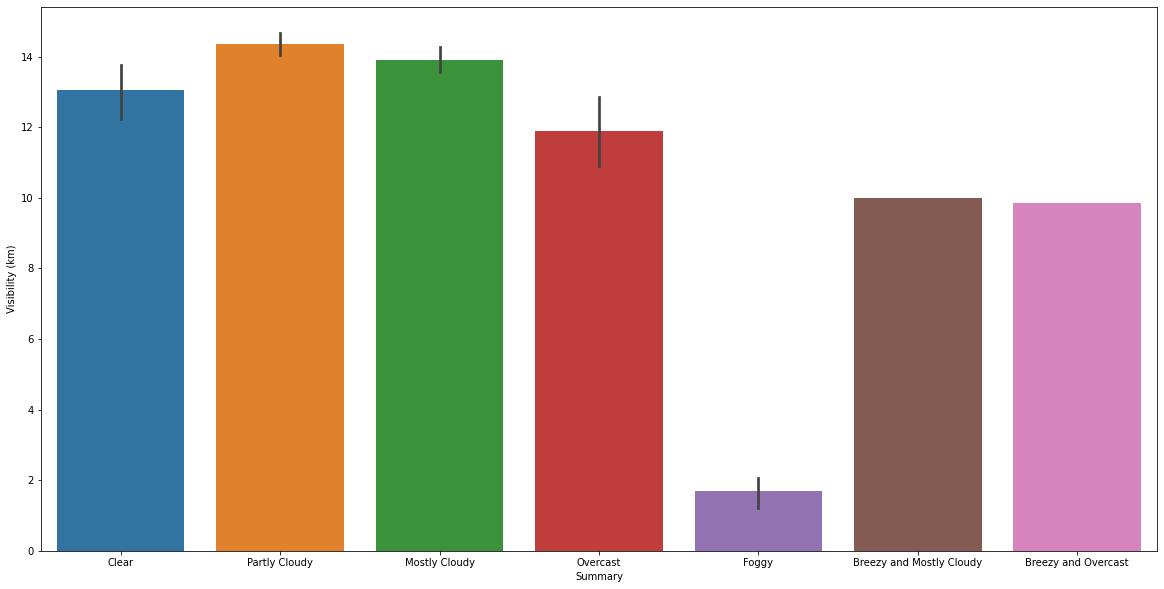

In [8]:
#effect of weather on visibility
plt.figure(figsize = (20,10))
sns.barplot(x = df["Summary"],y = df["Visibility (km)"])
plt.show()

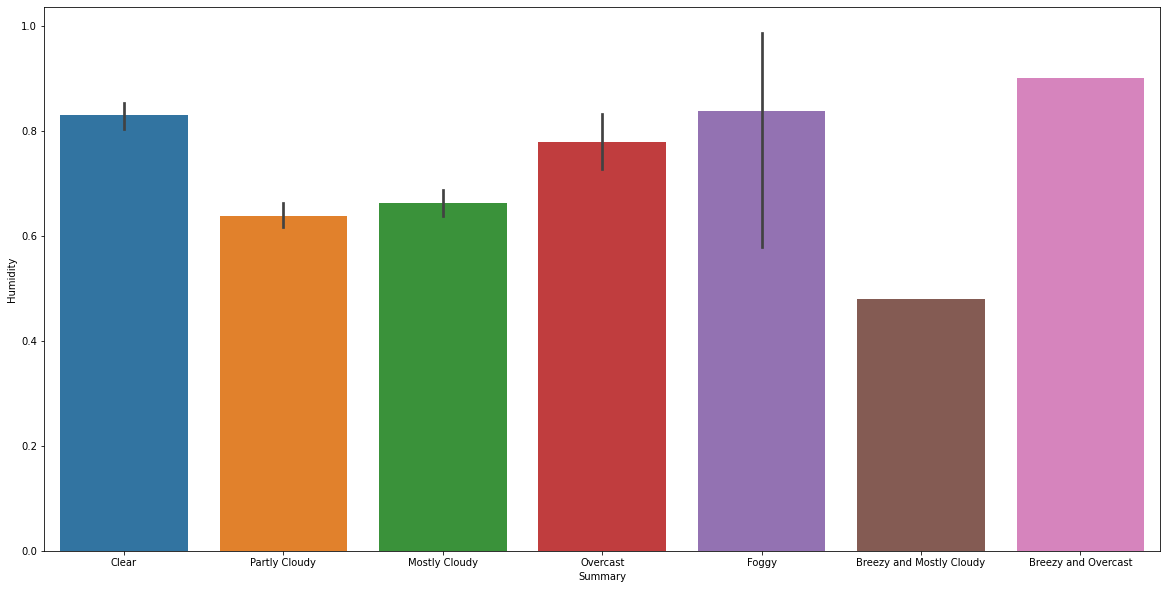

In [9]:
#effect of weather on humidity

plt.figure(figsize = (20,10))
sns.barplot(x = df["Summary"],y = df["Humidity"])
plt.show()

#### References

**Part-1**:

* **Pc** = Partly Cloudy
* **Mc** = Mostly Cloudy
* **F** = Foggy
* **O** = Overcast


**Part-2**:

* **sitm** = starting in the morning
* **sita** = starting in the afternoon
* **cun** = continuing till noon
* **cue** = continuing till evening

**Part-3**:

* **ttd** = throughout the day
* **so** = starting overnight
* **o** = overnight

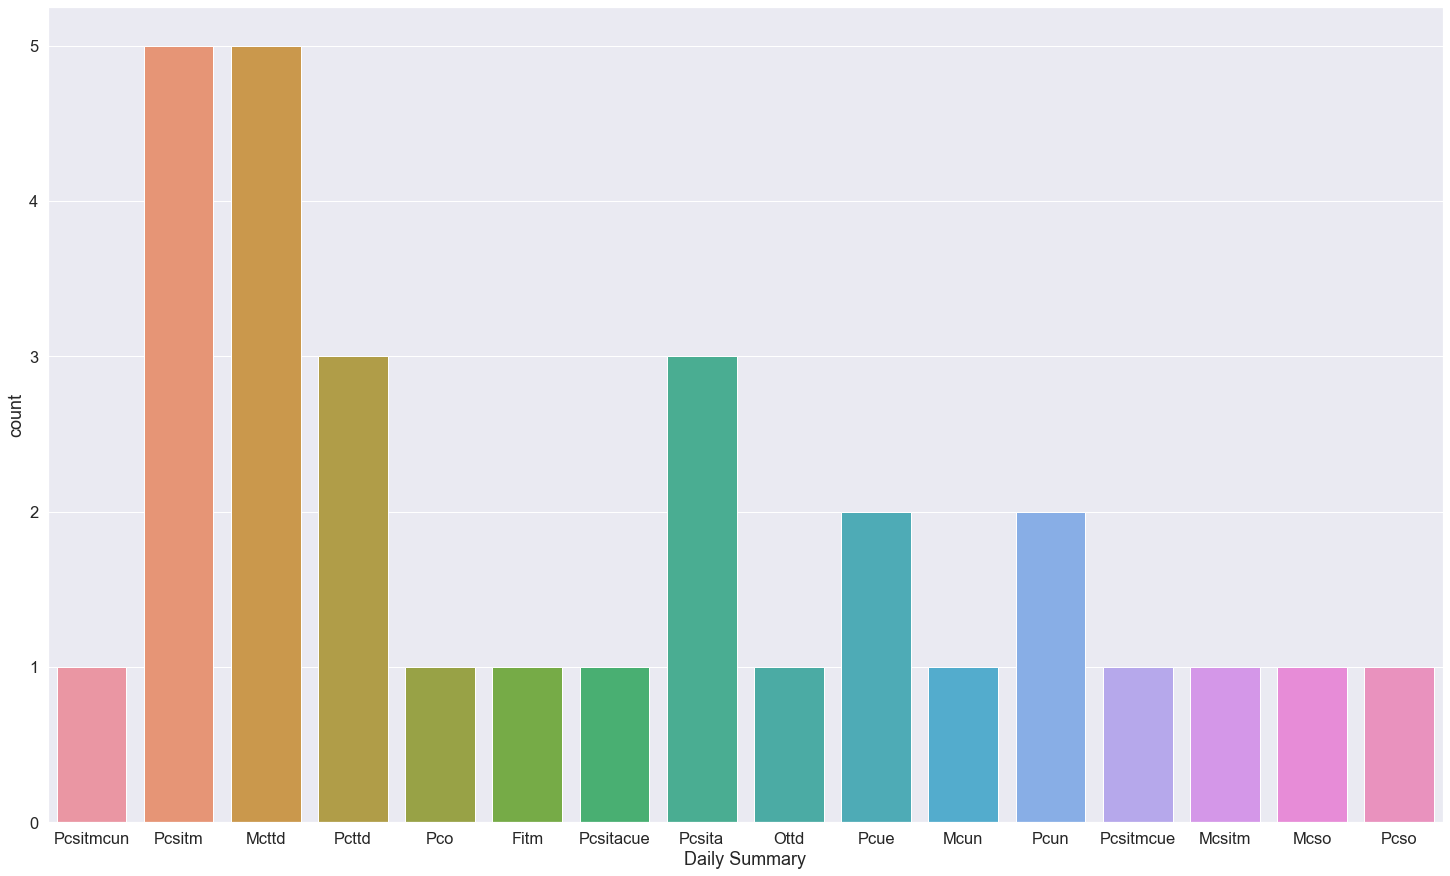

In [10]:
#count of daily weather summaries
days = [i for i in range(0,719,24)]
data_with_one_hour_per_day = df.iloc[days,:]

def shorten(text):
    if(text == 'NaN'):
        return text
    return("".join([i[0] for i in text.split(" ")]))

data_with_one_hour_per_day_1=data_with_one_hour_per_day["Daily Summary"].apply(shorten)

sns.set(font_scale = 1.5)

plt.figure(figsize = (25,15))
p = sns.countplot(data_with_one_hour_per_day_1)

printmd('#### References')
printmd('**Part-1**:')
printmd('* **Pc** = Partly Cloudy\n* **Mc** = Mostly Cloudy\n* **F** = Foggy\n* **O** = Overcast\n')
printmd('**Part-2**:')
printmd('* **sitm** = starting in the morning\n* **sita** = starting in the afternoon\n* **cun** = continuing till noon\n* **cue** = continuing till evening')
printmd("**Part-3**:")
printmd('* **ttd** = throughout the day\n* **so** = starting overnight\n* **o** = overnight')

## c. filtering of unwanted outliers

### i. via numerical methods (box plot/histogram)

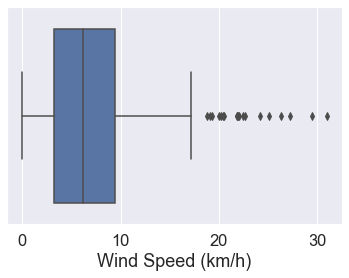

In [11]:
sns.boxplot(df["Wind Speed (km/h)"])
plt.show()

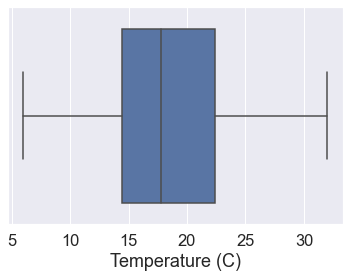

In [12]:
sns.boxplot(df["Temperature (C)"])
plt.show()

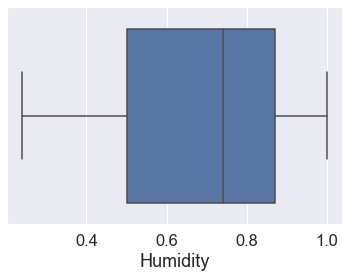

In [13]:
sns.boxplot(df["Humidity"])
plt.show()

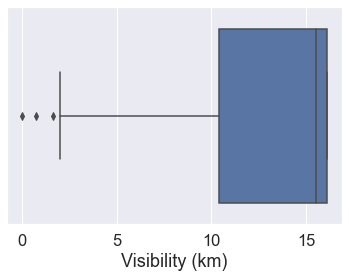

In [14]:
sns.boxplot(df["Visibility (km)"])
plt.show()

### ii. categorical (bar chart)

# 3. normalization and standardization

## a. mean and variance for each of the columns

## b. normalization of all the numeric columns (to make mean 0 and variance 1)

## c. reasons for the neccessity of normalization and the ways in which it affects datasets

## d. verification of the normality of data by using graphs

# 4. hypothesis testing

### Consists of 2 types of hypotheses:
- **H0**(Null hypothesis): Is usually the sample observations result purely from chance
- **H1**(Alternate hypothesis): Is the hypothesis that sample observations are influenced by some non-random cause

### While performing the hypothesis test:
- We put the null hypothesis on trial
- We begin by assumming that H0 is true
- The random sample provides the evidence
- The hypothesis test measures the strength of disagreement between the sample and H0

## a. research hypothesis

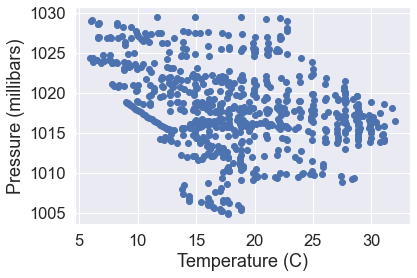

From the sample, we are confident that the inverse relationship between **Temperature(C)** and **Pressure(millibars)** is quite plausible

In [19]:
plt.scatter(df["Temperature (C)"],df["Pressure (millibars)"])
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (millibars)')
plt.show()
printmd("From the sample, we are confident that the inverse relationship between **Temperature(C)** and **Pressure(millibars)** is quite plausible")

### Can we prove that there is no apparent relationship between temperature and wind speed?

The general assumption here is that the temperature and pressure are inversely related

### Therefore:
H0: 

## b. statistical tests

## c. hypothesis based on columns of our choice

## d. decision on whether the null hypothesis is supported or rejected

# 5. correlation

## a. correlation b/w variables that are positively and negatively related

## b. inferences